In [ ]:
import pandas as pd
import numpy as np

# ساخت دیتای شبیه‌سازی شده فروش
np.random.seed(42)

dates = pd.date_range(start="2024-01-01", end="2024-03-31")
products = ["Laptop", "Mobile", "Tablet"]
cities = ["Istanbul", "Ankara", "Izmir"]

data = {
    "date": np.random.choice(dates, 300),
    "product": np.random.choice(products, 300),
    "city": np.random.choice(cities, 300),
    "price": np.random.randint(800, 3000, 300),
    "quantity": np.random.randint(1, 5, 300)
}

df = pd.DataFrame(data)

df["total_sales"] = df["price"] * df["quantity"]

df.head()


,date,product,city,price,quantity,total_sales
0,2024-02-21,Tablet,Ankara,1879,4,7516
1,2024-01-15,Tablet,Izmir,906,2,1812
2,2024-03-12,Laptop,Ankara,847,4,3388
3,2024-03-01,Laptop,Izmir,1136,4,4544
4,2024-01-21,Tablet,Ankara,1849,2,3698


In [ ]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300 entries, 0 to 299
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   date         300 non-null    datetime64[ns]
 1   product      300 non-null    object        
 2   city         300 non-null    object        
 3   price        300 non-null    int64         
 4   quantity     300 non-null    int64         
 5   total_sales  300 non-null    int64         
dtypes: datetime64[ns](1), int64(3), object(2)
memory usage: 14.2+ KB


In [ ]:
df.describe()


,date,price,quantity,total_sales
count,300,300.000000,300.00000,300.000000
mean,2024-02-14 11:45:36,1965.626667,2.44000,4773.633333
min,2024-01-01 00:00:00,803.000000,1.00000,803.000000
25%,2024-01-21 18:00:00,1412.000000,1.00000,2585.250000
50%,2024-02-15 00:00:00,2001.500000,2.00000,4514.000000
75%,2024-03-09 00:00:00,2590.500000,3.00000,6179.500000
max,2024-03-31 00:00:00,2992.000000,4.00000,11968.000000
std,NaN,664.150933,1.08797,2718.658815


In [ ]:
product_sales = df.groupby("product")["total_sales"].sum().sort_values(ascending=False)

product_sales


,total_sales
product,
Laptop,589586
Mobile,441144
Tablet,401360


In [ ]:
total_revenue = df["total_sales"].sum()

percentage = (product_sales / total_revenue) * 100

percentage


,total_sales
product,
Laptop,41.169619
Mobile,30.804209
Tablet,28.026172


In [ ]:
city_sales = df.groupby("city")["total_sales"].sum().sort_values(ascending=False)

city_sales


,total_sales
city,
Istanbul,544631
Ankara,468699
Izmir,418760


In [ ]:
city_product_sales = df.groupby(["city", "product"])["total_sales"].sum().unstack()

city_product_sales


product,Laptop,Mobile,Tablet
city,,,
Ankara,187810,143704,137185
Istanbul,210515,184360,149756
Izmir,191261,113080,114419


In [ ]:
monthly_sales = df.resample("M", on="date")["total_sales"].sum()

monthly_sales


/tmp/ipython-input-39986927.py:1: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  monthly_sales = df.resample("M", on="date")["total_sales"].sum()


,total_sales
date,
2024-01-31,494142
2024-02-29,464587
2024-03-31,473361


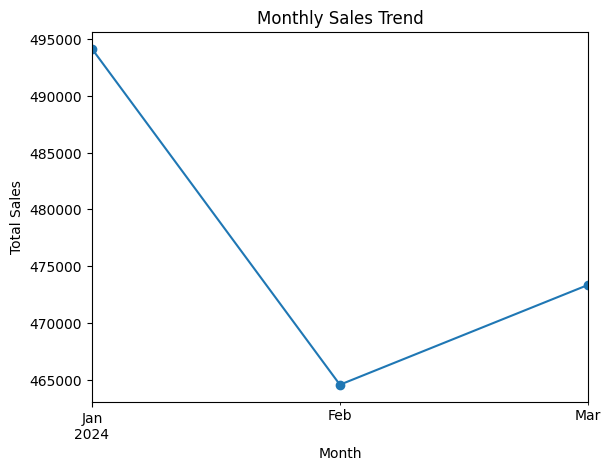

In [ ]:
import matplotlib.pyplot as plt

monthly_sales.plot(marker="o")
plt.title("Monthly Sales Trend")
plt.xlabel("Month")
plt.ylabel("Total Sales")
plt.show()


In [ ]:
print("Key Insights:")
print("- Laptops generate the highest revenue across all cities.")
print("- Istanbul is the top-performing city.")
print("- Sales peaked in January, dropped in February, and slightly recovered in March.")
print("- Laptops contribute more than 40% of total revenue.")


Key Insights:
- Laptops generate the highest revenue across all cities.
- Istanbul is the top-performing city.
- Sales peaked in January, dropped in February, and slightly recovered in March.
- Laptops contribute more than 40% of total revenue.
